<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-2-Regression-1/blob/master/Daniel_Calimayor_evaluating_forecasts_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import files
files.upload()

Saving pageviews-20150701-20190523.csv to pageviews-20150701-20190523.csv


{'pageviews-20150701-20190523.csv': b'Date,"Uber"\n2015-07-01,929\n2015-07-02,726\n2015-07-03,846\n2015-07-04,730\n2015-07-05,689\n2015-07-06,852\n2015-07-07,917\n2015-07-08,911\n2015-07-09,766\n2015-07-10,739\n2015-07-11,585\n2015-07-12,548\n2015-07-13,729\n2015-07-14,786\n2015-07-15,703\n2015-07-16,1122\n2015-07-17,1073\n2015-07-18,707\n2015-07-19,689\n2015-07-20,981\n2015-07-21,1060\n2015-07-22,1145\n2015-07-23,1397\n2015-07-24,1168\n2015-07-25,774\n2015-07-26,807\n2015-07-27,953\n2015-07-28,856\n2015-07-29,739\n2015-07-30,767\n2015-07-31,1003\n2015-08-01,1069\n2015-08-02,823\n2015-08-03,990\n2015-08-04,859\n2015-08-05,834\n2015-08-06,895\n2015-08-07,634\n2015-08-08,619\n2015-08-09,699\n2015-08-10,824\n2015-08-11,893\n2015-08-12,940\n2015-08-13,847\n2015-08-14,831\n2015-08-15,705\n2015-08-16,705\n2015-08-17,817\n2015-08-18,793\n2015-08-19,768\n2015-08-20,717\n2015-08-21,719\n2015-08-22,575\n2015-08-23,597\n2015-08-24,664\n2015-08-25,625\n2015-08-26,634\n2015-08-27,605\n2015-08-28,60

In [0]:
u = pd.read_csv('pageviews-20150701-20190523.csv')

In [0]:
uber = u.rename(columns={'Date':'ds', 'Uber':'y'})

In [6]:
uber.head()

,ds,y
0,2015-07-01,929
1,2015-07-02,726
2,2015-07-03,846
3,2015-07-04,730
4,2015-07-05,689


In [0]:
uber['ds'] = pd.to_datetime(uber['ds'])
uber['ds'] = pd.to_datetime(uber['ds'], format='%Y%m%d')

In [0]:
uber = uber.set_index('ds')

In [9]:
uber.tail()

,y
ds,
2019-05-19,4535
2019-05-20,4897
2019-05-21,4876
2019-05-22,4953
2019-05-23,4470


In [0]:
train = uber['2015-07-01':'2019-05-23']
test = uber['2018-05-24': '2019-05-24']

In [0]:
train = train.reset_index()
test = test.reset_index()

In [0]:
pd.plotting.register_matplotlib_converters()

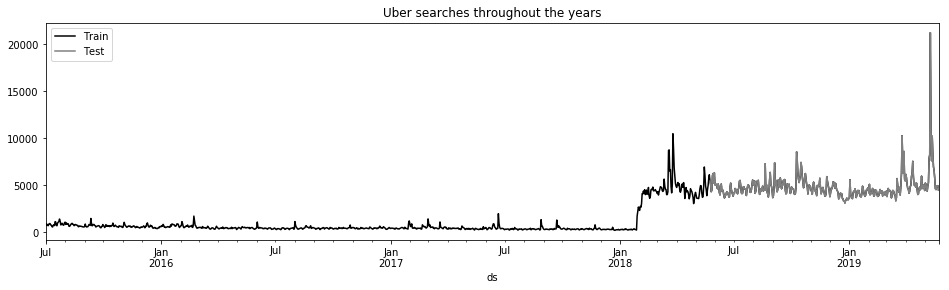

In [13]:
ax = train.plot(x = 'ds', y = 'y', color = 'black', label = 'Train', figsize = (16, 4))
test.plot(x='ds', y='y', color='grey', label='Test', ax=ax)
plt.title('Uber searches throughout the years');

Mean Baseline

In [0]:
train['mean_baseline'] = train['y'].mean()
test['mean_baseline'] = train['y'].mean()

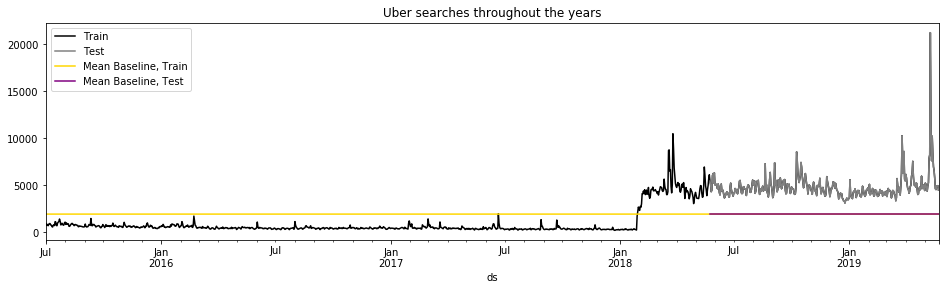

In [15]:
ax = train.plot(x = 'ds', y = 'y', color = 'black', label = 'Train', figsize = (16,4))
test.plot(x = 'ds', y = 'y', color = 'grey', label = 'Test', ax=ax)
train.plot(x = 'ds', y = 'mean_baseline', color = 'gold',
           label = 'Mean Baseline, Train', ax=ax)
test.plot(x = 'ds', y = 'mean_baseline', color = 'purple',
          label = 'Mean Baseline, Test', ax=ax)
plt.title('Uber searches throughout the years');

Naive Baseline

In [0]:
train['naive_baseline'] = train['y'].shift(1).bfill()
train_last_observation = train['naive_baseline'].iloc[-1]
test['naive_baseline'] = train_last_observation

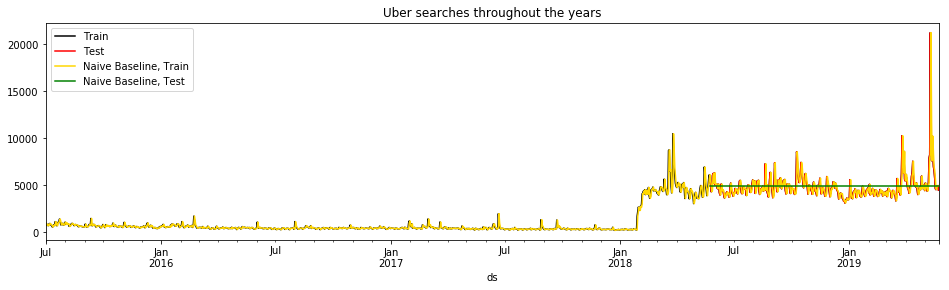

In [17]:
ax = train.plot(x = 'ds', y = 'y', color = 'black', label = 'Train', figsize = (16,4))
test.plot(x = 'ds', y = 'y', color = 'red', label = 'Test', ax=ax)
train.plot(x = 'ds', y = 'naive_baseline', label = 'Naive Baseline, Train', color = 'gold', ax=ax)
test.plot(x = 'ds', y = 'naive_baseline', label = 'Naive Baseline, Test', color = 'Green', ax=ax)
plt.title('Uber searches throughout the years');

MEA Mean/Naive Baseline

In [0]:
from sklearn.metrics import mean_absolute_error

In [19]:
train_mae = mean_absolute_error(train['y'], train['mean_baseline'])
test_mae = mean_absolute_error(test['y'], test['mean_baseline'])
print('Train MAE, for naive baseline:', train_mae)
print('Test MAE, for naive baseline:', test_mae)

Train MAE, for naive baseline: 1910.5848195171284
Test MAE, for naive baseline: 2890.167602691593


In [20]:
train_maen = mean_absolute_error(train['y'], train['naive_baseline'])
test_maen = mean_absolute_error(test['y'], test['naive_baseline'])
print('Train MAE, for naive baseline:', train_maen)
print('Test MAE, for naive baseline:', test_maen)

Train MAE, for naive baseline: 241.42164441321154
Test MAE, for naive baseline: 783.6493150684931


Prophet Forecast

In [0]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [22]:
%%time
weather_model = Prophet(daily_seasonality = False)
weather_model.fit(train)
train_forecast = weather_model.predict(train)
test_forecast = weather_model.predict(test)

CPU times: user 10.5 s, sys: 5.11 s, total: 15.6 s
Wall time: 9.19 s


In [23]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-24,4559.278583,4017.793179,5930.797835,4559.278583,4559.278583,444.036272,444.036272,444.036272,48.428410,48.428410,48.428410,395.607862,395.607862,395.607862,0.0,0.0,0.0,5003.314854
1,2018-05-25,4560.733539,3934.062020,5828.174037,4560.733539,4560.733539,357.326351,357.326351,357.326351,2.510871,2.510871,2.510871,354.815480,354.815480,354.815480,0.0,0.0,0.0,4918.059889
2,2018-05-26,4562.188495,3691.187204,5634.671557,4562.188495,4562.188495,64.259300,64.259300,64.259300,-250.038907,-250.038907,-250.038907,314.298207,314.298207,314.298207,0.0,0.0,0.0,4626.447794
3,2018-05-27,4563.643450,3654.512074,5641.677620,4563.643450,4563.643450,77.000202,77.000202,77.000202,-197.733724,-197.733724,-197.733724,274.733926,274.733926,274.733926,0.0,0.0,0.0,4640.643652
4,2018-05-28,4565.098406,4011.208193,5857.976135,4565.098406,4565.098406,371.478781,371.478781,371.478781,134.742423,134.742423,134.742423,236.736358,236.736358,236.736358,0.0,0.0,0.0,4936.577188


In [24]:
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1418,2019-05-19,5083.062549,4558.676819,6443.959981,5083.062549,5083.062549,386.563572,386.563572,386.563572,-197.733724,-197.733724,-197.733724,584.297296,584.297296,584.297296,0.0,0.0,0.0,5469.626121
1419,2019-05-20,5084.517504,4844.073281,6813.122422,5084.517504,5084.517504,689.294635,689.294635,689.294635,134.742423,134.742423,134.742423,554.552212,554.552212,554.552212,0.0,0.0,0.0,5773.812139
1420,2019-05-21,5085.972460,4854.737584,6701.756741,5085.972460,5085.972460,684.443270,684.443270,684.443270,163.391406,163.391406,163.391406,521.051864,521.051864,521.051864,0.0,0.0,0.0,5770.415730
1421,2019-05-22,5087.427415,4683.857316,6675.366052,5087.427415,5087.427415,583.262162,583.262162,583.262162,98.699522,98.699522,98.699522,484.562641,484.562641,484.562641,0.0,0.0,0.0,5670.689577
1422,2019-05-23,5088.882370,4629.146701,6486.112624,5088.882370,5088.882370,494.299244,494.299244,494.299244,48.428410,48.428410,48.428410,445.870834,445.870834,445.870834,0.0,0.0,0.0,5583.181614


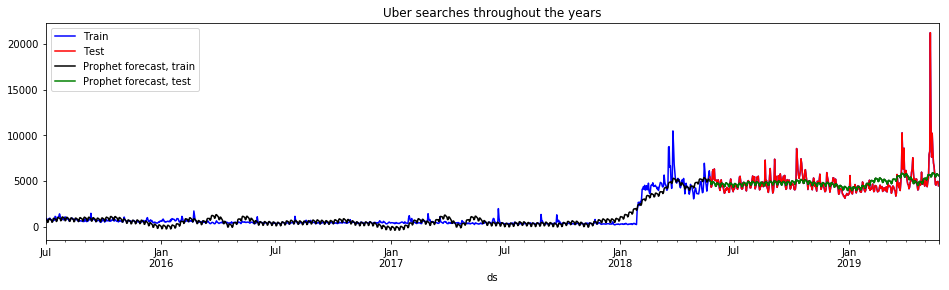

In [25]:
ax = train.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
test.plot(x='ds', y='y', color='red', label='Test', ax=ax)
train_forecast.plot(x='ds', y='yhat', color='black', 
                    label='Prophet forecast, train', ax=ax)
test_forecast.plot(x='ds', y='yhat', color='green', 
                   label='Prophet forecast, test', ax=ax)
plt.title('Uber searches throughout the years');

Cross Validation

In [26]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(weather_model, initial='730 days', 
                         horizon='365 days', period='180 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2017-11-24 00:00:00 and 2018-05-23 00:00:00


In [27]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-11-25,249.010996,79.313892,425.033950,275,2017-11-24
1,2017-11-26,267.339010,103.687802,432.900037,299,2017-11-24
2,2017-11-27,387.106278,207.839099,552.640582,375,2017-11-24
3,2017-11-28,375.934830,200.694100,569.660669,419,2017-11-24
4,2017-11-29,399.491842,221.329000,583.388144,438,2017-11-24
5,2017-11-30,383.333963,202.365820,540.271448,359,2017-11-24
6,2017-12-01,367.928618,202.304657,542.007858,287,2017-11-24
7,2017-12-02,286.565603,119.331778,460.773035,248,2017-11-24
8,2017-12-03,308.098391,138.856157,491.348817,262,2017-11-24
9,2017-12-04,430.129197,248.716409,614.647531,298,2017-11-24


performance_metrics

In [28]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,1.330238e+06,1153.359464,778.103999,0.325684,0.589041
1,38 days,1.410947e+06,1187.832773,810.241873,0.339113,0.575342
2,39 days,1.464519e+06,1210.173226,830.371222,0.345735,0.568493
3,40 days,1.531774e+06,1237.648585,850.636667,0.353758,0.568493
4,41 days,1.575781e+06,1255.301169,868.847897,0.360737,0.561644


plot_cross_validation_metric

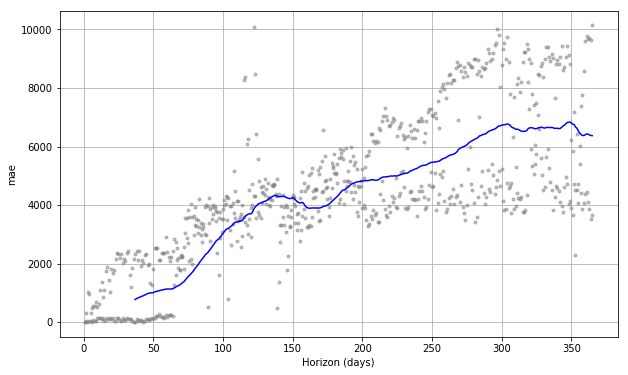

In [29]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')